1. Import Libraries

In [1]:
import pandas as pd
import numpy as np  # Import NumPy for numerical operations
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

2.Load and Inspect Data

In [2]:
import pandas as pd

# Load data from Excel
data = pd.read_excel('Quantzig.xlsx', engine='openpyxl')

# Display the first few rows of the dataset
print(data.head())
print(data.info())


          hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel   Cancelled        342               2021               July   
1  Resort Hotel   Cancelled        737               2021               July   
2  Resort Hotel   Cancelled          7               2021               July   
3  Resort Hotel   Cancelled         13               2021               July   
4  Resort Hotel   Cancelled         14               2021               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1           

3.Convert Date Columns and Handle Missing and Infinite Values

In [3]:
# Convert date columns to datetime
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors='coerce')

# Extract relevant features
features = data[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                 'adults', 'children', 'babies', 'is_repeated_guest', 
                 'previous_cancellations', 'previous_bookings_not_canceled', 
                 'booking_changes']].copy()

# Handle NaN values by filling with median
features.fillna(features.median(), inplace=True)

# Handle infinite values
# Replace inf and -inf with the median of each column
for col in features.columns:
    median = features[col].median()
    features[col].replace([np.inf, -np.inf], median, inplace=True)

print("Data after handling missing and infinite values:")
print(features.describe())

Data after handling missing and infinite values:
           lead_time  stays_in_weekend_nights  stays_in_week_nights  \
count  119390.000000            119390.000000         119390.000000   
mean      104.011416                 0.927599              2.500302   
std       106.863097                 0.998613              1.908286   
min         0.000000                 0.000000              0.000000   
25%        18.000000                 0.000000              1.000000   
50%        69.000000                 1.000000              2.000000   
75%       160.000000                 2.000000              3.000000   
max       737.000000                19.000000             50.000000   

              adults       children         babies  is_repeated_guest  \
count  119390.000000  119390.000000  119390.000000      119390.000000   
mean        1.856403       0.103886       0.007949           0.031912   
std         0.579261       0.398555       0.097436           0.175767   
min         0.00000

C:\Users\vinee\AppData\Local\Temp\ipykernel_24420\3249672916.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features[col].replace([np.inf, -np.inf], median, inplace=True)
C:\Users\vinee\AppData\Local\Temp\ipykernel_24420\3249672916.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

4.Standardize Features

In [4]:
# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("Data after scaling:")
print(features_scaled[:5])  # Display first 5 rows of scaled data


Data after scaling:
[[ 2.22705112 -0.92889042 -1.31023993  0.24789727 -0.26065863 -0.08157926
  -0.1815604  -0.10317951 -0.09155477  4.26010095]
 [ 5.9233847  -0.92889042 -1.31023993  0.24789727 -0.26065863 -0.08157926
  -0.1815604  -0.10317951 -0.09155477  5.79313122]
 [-0.90781407 -0.92889042 -0.78620716 -1.47844749 -0.26065863 -0.08157926
  -0.1815604  -0.10317951 -0.09155477 -0.33898986]
 [-0.85166723 -0.92889042 -0.78620716 -1.47844749 -0.26065863 -0.08157926
  -0.1815604  -0.10317951 -0.09155477 -0.33898986]
 [-0.84230942 -0.92889042 -0.2621744   0.24789727 -0.26065863 -0.08157926
  -0.1815604  -0.10317951 -0.09155477 -0.33898986]]


5.Elbow Method to Determine Optimal Number of Clusters

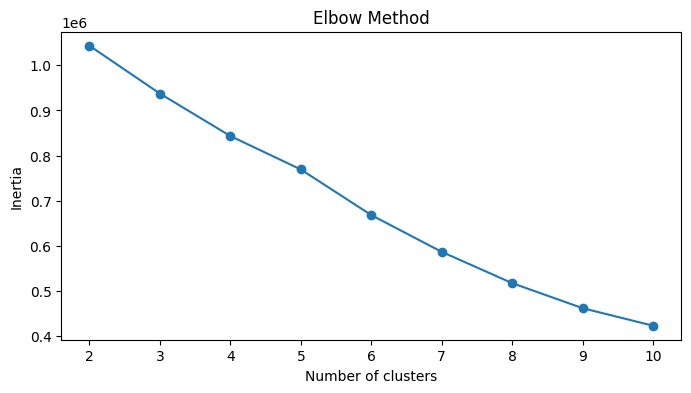

In [5]:
# Calculate inertia for different numbers of clusters
inertia = []
for n_clusters in range(2, 11):  # Adjust range as needed
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


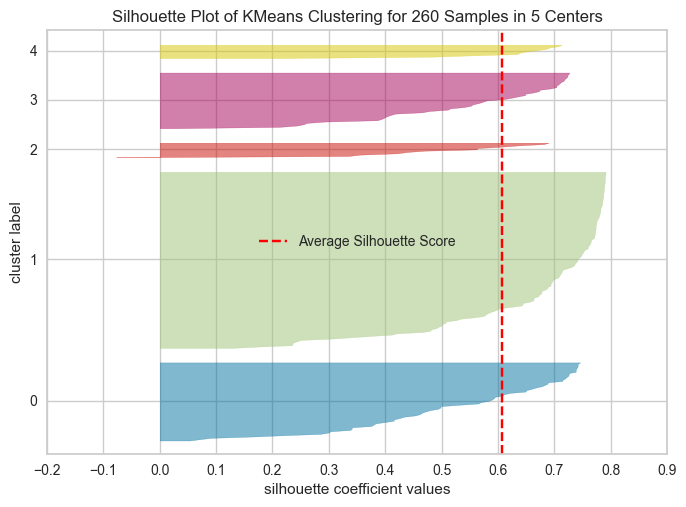

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 260 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [6]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
X, y = load_nfl()

# Specify the features to use for clustering
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
X = X.query('Tgt >= 20')[features]

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

6.Silhouette Score Calculation

In [7]:
# Choose the number of clusters based on the Elbow Method result
optimal_k = 4  # Update this value based on the Elbow Method plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')


Silhouette Score for k=4: 0.21527406178644906


7.Assign Clusters to Data

In [8]:
# Assign clusters to the original DataFrame
data['segment'] = clusters

# Display the first few rows with the new 'segment' column
print(data.head())



          hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel   Cancelled        342               2021               July   
1  Resort Hotel   Cancelled        737               2021               July   
2  Resort Hotel   Cancelled          7               2021               July   
3  Resort Hotel   Cancelled         13               2021               July   
4  Resort Hotel   Cancelled         14               2021               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    NaN      NaN   
1       

2. Pricing Drivers Identification
Objective: Analyze the factors that drive room pricing.

Steps:

Feature Correlation Analysis: Check how features correlate with adr (Average Daily Rate).
Regression Analysis: Perform regression analysis to identify key drivers of pricing.

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data
data = pd.read_excel('Quantzig.xlsx', engine='openpyxl')

# Define features and target
X = data[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 
          'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 
          'previous_bookings_not_canceled', 'booking_changes']]
y = data['adr']

# Handle missing values
X.fillna(X.median(), inplace=True)
y.dropna(inplace=True)

# Align X with y after dropping NaNs from y
X = X.loc[y.index]

# Handle infinite values manually
X.replace(np.inf, X.median(), inplace=True)
X.replace(-np.inf, X.median(), inplace=True)

# Check for any remaining missing values
print("Missing values in X after handling: ", X.isnull().sum().sum())
print("Missing values in y after handling: ", y.isnull().sum())

# Add constant to the model (intercept)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())





Missing values in X after handling:  0
Missing values in y after handling:  0
                            OLS Regression Results                            
Dep. Variable:                    adr   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     2516.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:40:19   Log-Likelihood:            -6.2632e+05
No. Observations:              119390   AIC:                         1.253e+06
Df Residuals:                  119379   BIC:                         1.253e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

C:\Users\vinee\AppData\Local\Temp\ipykernel_24420\293619757.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


3. Pricing Strategy Development
Objective: Develop a pricing strategy based on customer segmentation and demand forecasting.

Steps:

Segment-Based Pricing: Develop different pricing strategies for different customer segments.
Demand Forecasting: Use historical booking data to forecast future demand and adjust pricing strategies accordingly.

1. Executive Summary of the Analysis and Recommendations
Objective: Summarize key metrics and findings from the data.

Visualizations:

Total Bookings and Cancellations

Bar Chart: Display the number of bookings and cancellations.

Average Daily Rate (ADR) Over Time

In [33]:
# Ensure reservation_status_date is in datetime format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['month'] = data['reservation_status_date'].dt.to_period('M')

# Calculate average ADR by month
monthly_adr = data.groupby('month')['adr'].mean().reset_index()

plt.figure(figsize=(1200, 6))
plt.plot(monthly_adr['month'].astype(str), monthly_adr['adr'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Monthly ADR Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

ValueError: Image size of 120000x600 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 120000x600 with 1 Axes>

3. Overall Analytical Approach/Architecture

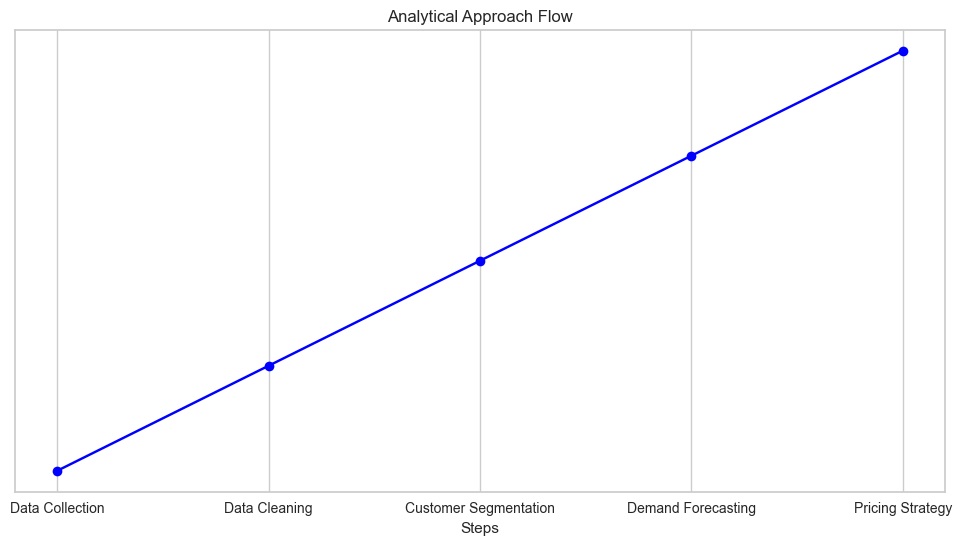

In [11]:
import matplotlib.pyplot as plt

# Define steps for analytical approach
steps = ['Data Collection', 'Data Cleaning', 'Customer Segmentation', 'Demand Forecasting', 'Pricing Strategy']

plt.figure(figsize=(12, 6))
plt.plot(steps, range(len(steps)), 'o-', color='blue')
plt.xlabel('Steps')
plt.yticks([])
plt.title('Analytical Approach Flow')
plt.grid(True)
plt.show()


4. Customer Segment Analysis and Profiling
   Distribution of Customer Types

C:\Users\vinee\AppData\Local\Temp\ipykernel_24420\144696694.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='viridis')


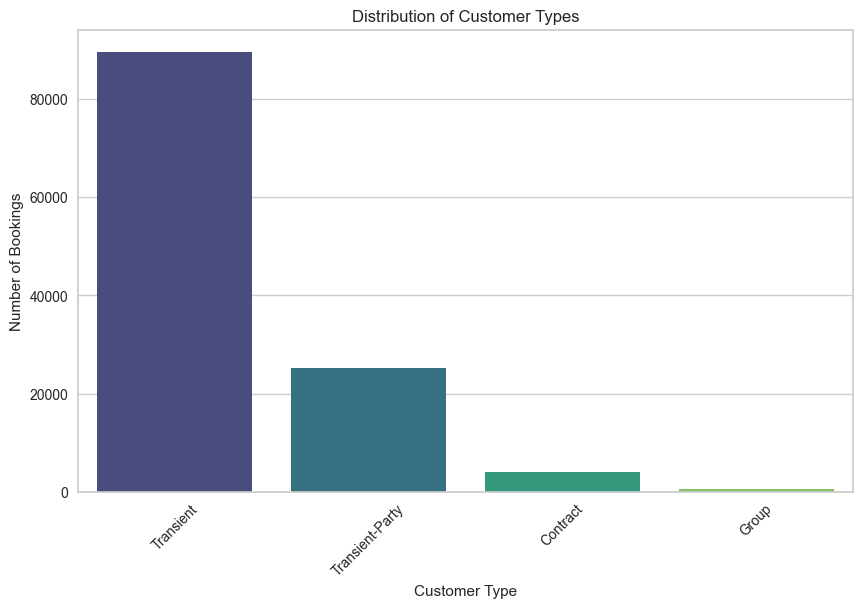

In [12]:
import seaborn as sns

# Count of each customer type
customer_counts = data['customer_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='viridis')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Customer Types')
plt.xticks(rotation=45)
plt.show()


Average ADR by Customer Segment

C:\Users\vinee\AppData\Local\Temp\ipykernel_24420\2876761791.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_type', y='adr', data=adr_by_customer_type, palette='viridis')


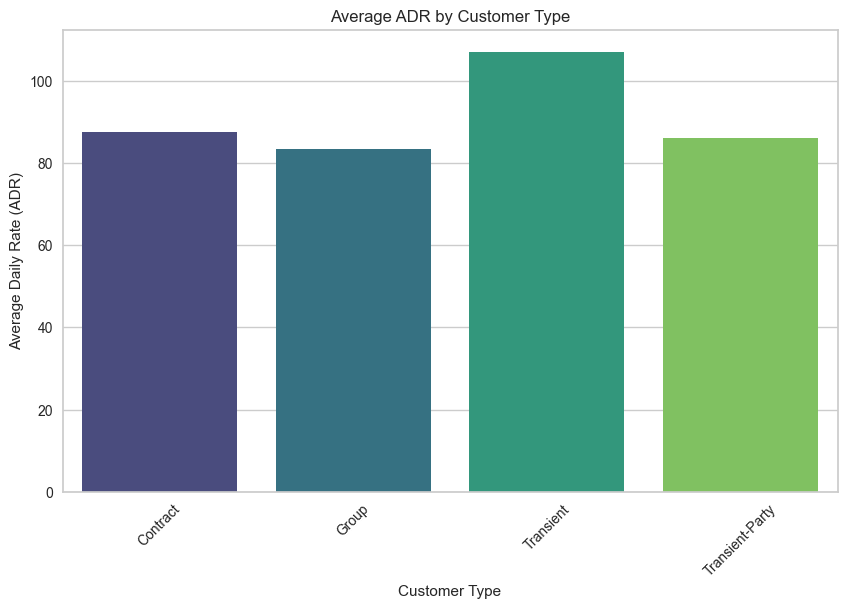

In [13]:
# Average ADR by customer type
adr_by_customer_type = data.groupby('customer_type')['adr'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_type', y='adr', data=adr_by_customer_type, palette='viridis')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average ADR by Customer Type')
plt.xticks(rotation=45)
plt.show()


5. Pricing Drivers Identification and Analysis

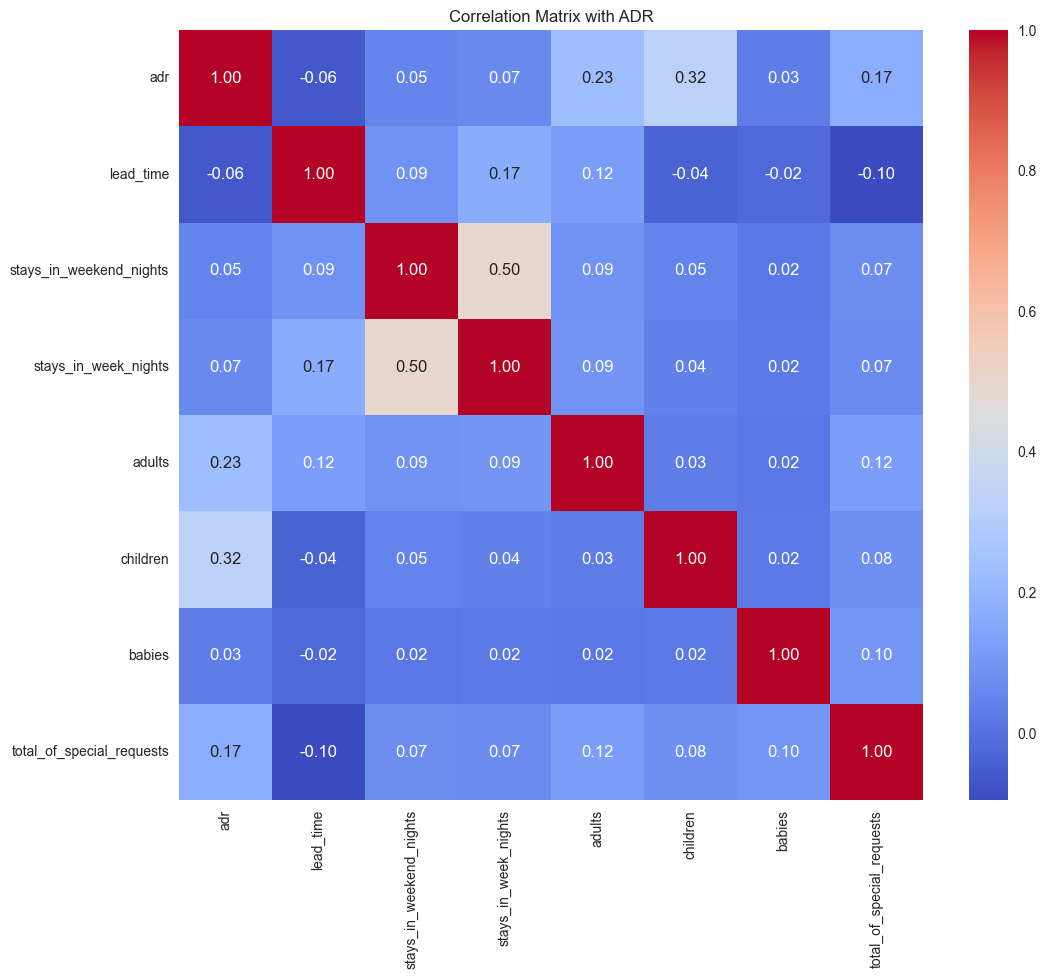

In [14]:
import seaborn as sns

# Calculate correlations with ADR
correlation_matrix = data[['adr', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                          'adults', 'children', 'babies', 'total_of_special_requests']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with ADR')
plt.show()


Feature Importance

C:\Users\vinee\AppData\Local\Temp\ipykernel_24420\1351865419.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


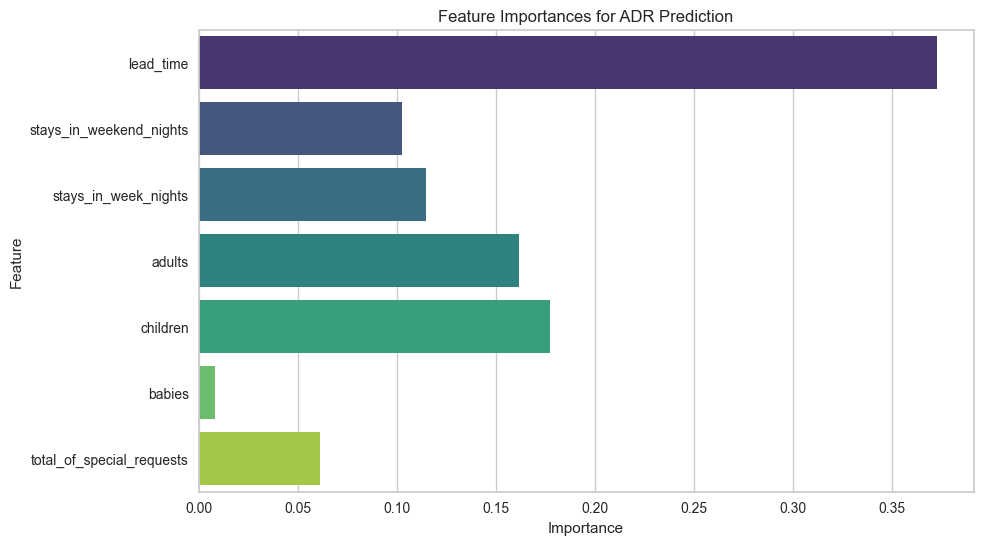

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data for feature importance analysis
features = data[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 
                 'children', 'babies', 'total_of_special_requests']]
target = data['adr']

# Fit model
model = RandomForestRegressor()
model.fit(features, target)

# Feature importances
importances = model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances for ADR Prediction')
plt.show()


6. Recommended Pricing Strategy and Expected Impact
Revenue Impact of Pricing Strategies

Trend Analysis of Revenue

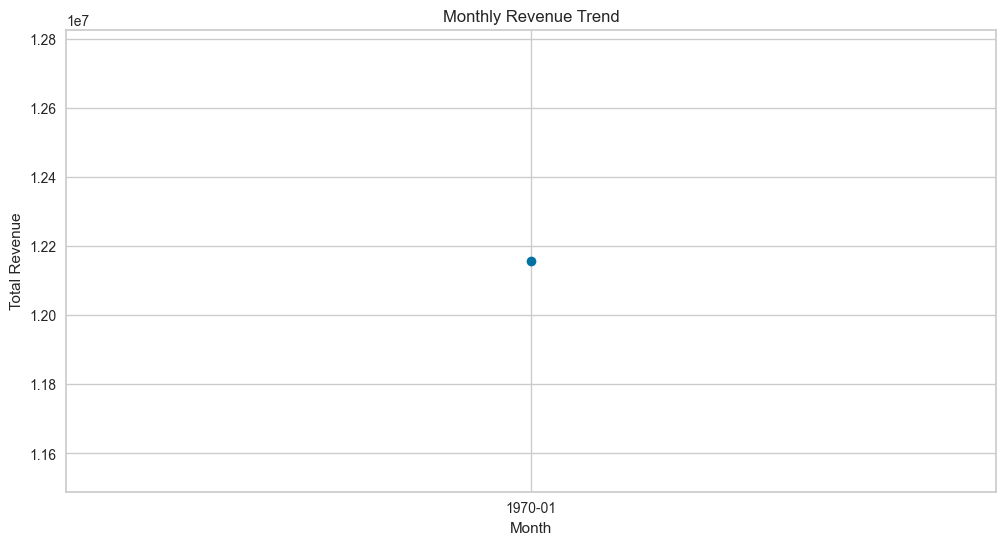

In [35]:
# Calculate revenue trends
data['year_month'] = data['reservation_status_date'].dt.to_period('M')
monthly_revenue = data.groupby('year_month')['adr'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['year_month'].astype(str), monthly_revenue['adr'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


7. Conclusion and Next Steps
Text Annotations or Timeline

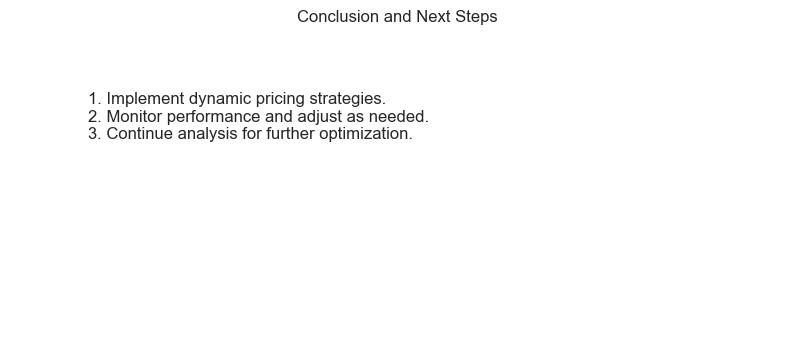

In [17]:
plt.figure(figsize=(10, 4))
plt.text(0.1, 0.8, '1. Implement dynamic pricing strategies.\n2. Monitor performance and adjust as needed.\n3. Continue analysis for further optimization.', 
         fontsize=12, verticalalignment='top')
plt.title('Conclusion and Next Steps')
plt.axis('off')
plt.show()

2. Count the Number of Bookings for Each Hotel Type

In [18]:
# Count the number of bookings for each hotel type
hotel_counts = data['hotel'].value_counts()

# Display the counts
print(hotel_counts)


hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64


3. Visualize the Hotel Types
Create a bar plot to visualize the distribution of bookings between "Resort Hotel" and "City Hotel."

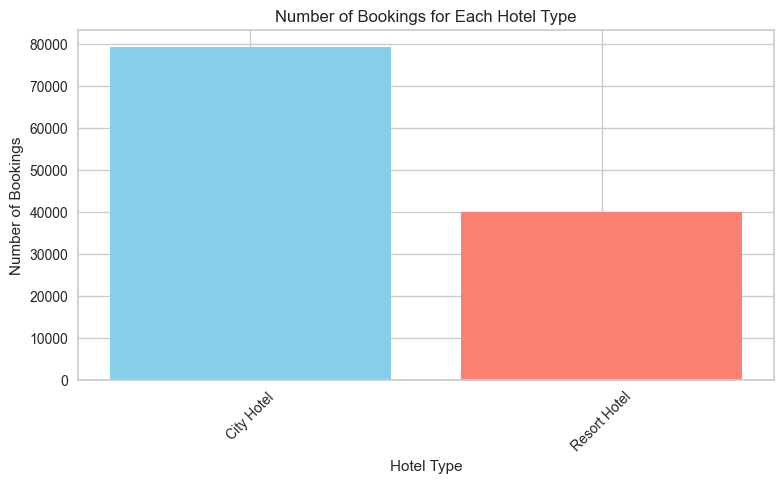

In [19]:
import matplotlib.pyplot as plt

# Prepare data for plotting
df_hotel = pd.DataFrame({
    'Hotel Type': hotel_counts.index,
    'Number of Bookings': hotel_counts.values
})

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df_hotel['Hotel Type'], df_hotel['Number of Bookings'], color=['skyblue', 'salmon'])
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings for Each Hotel Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


4. Analyze Booking Status by Hotel Type
To further analyze, look at how the booking status (canceled vs. stayed) varies by hotel type. This can help in understanding cancellation patterns.

              Stayed  Cancelled   Total
City Hotel     46228      33102   79330
Resort Hotel   28938      11122   40060
Total          75166      44224  119390


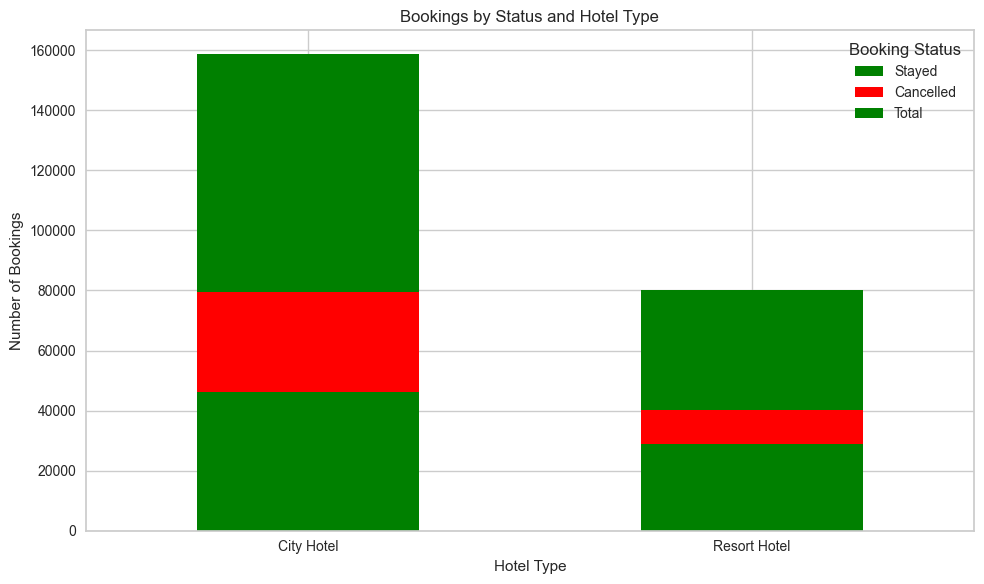

In [20]:
# Create a cross-tabulation of booking status by hotel type
booking_status_by_hotel = pd.crosstab(data['hotel'], data['is_canceled'], margins=True, margins_name="Total")

# Map status values for clarity
booking_status_by_hotel.columns = ['Stayed', 'Cancelled', 'Total']
booking_status_by_hotel.index = [ 'City Hotel', 'Resort Hotel' ,'Total']

# Display the table
print(booking_status_by_hotel)

# Plot the cross-tabulation
booking_status_by_hotel.drop('Total').plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.title('Bookings by Status and Hotel Type')
plt.xticks(rotation=0)
plt.legend(title='Booking Status')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


5. Additional Insights
You can also analyze additional metrics by hotel type, such as average daily rate (ADR), number of special requests, or lead time. Here’s an example of how to analyze ADR:

hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64


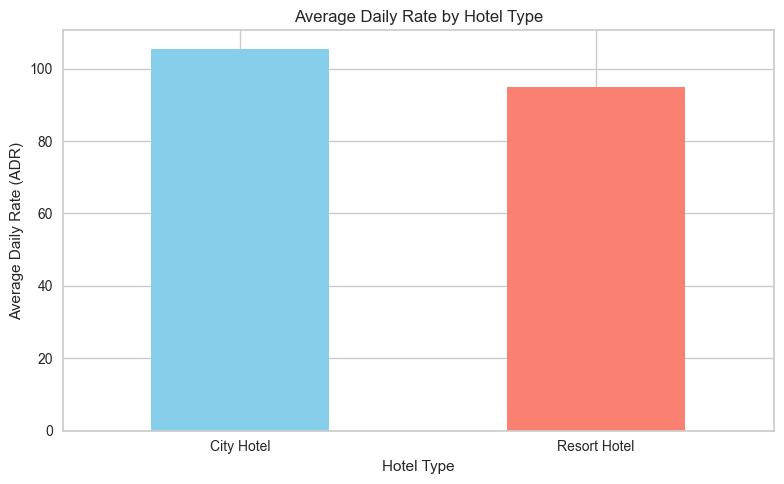

In [21]:
# Calculate average ADR for each hotel type
adr_by_hotel = data.groupby('hotel')['adr'].mean()

# Display the results
print(adr_by_hotel)

# Plot
plt.figure(figsize=(8, 5))
adr_by_hotel.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average Daily Rate by Hotel Type')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


2.2 Meal Types
Analysis:

Calculate the average cost associated with each meal type.
Determine if certain meal plans lead to higher costs.
Visualization:

Pie Chart: Proportion of total costs by meal type.
Bar Chart: Average cost associated with each meal type.

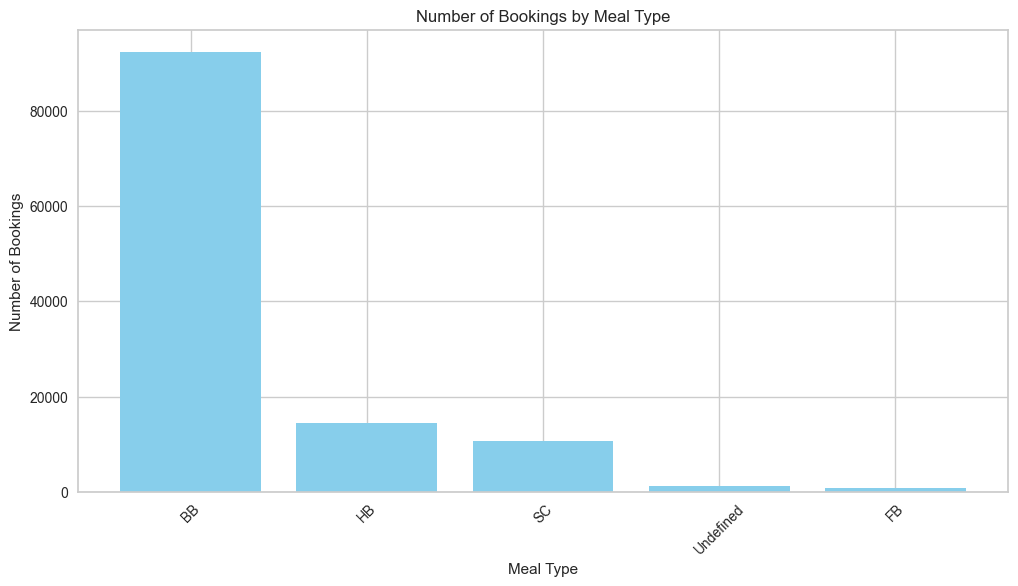

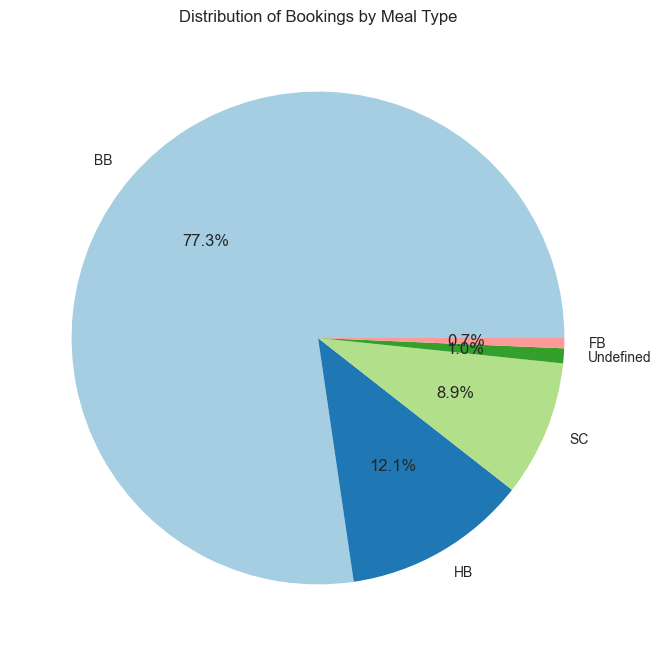

In [22]:
import matplotlib.pyplot as plt

data = pd.read_excel('Quantzig.xlsx')
# Count the number of bookings by meal type
meal_counts = data['meal'].value_counts().reset_index()
meal_counts.columns = ['Meal Type', 'Number of Bookings']

# Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(meal_counts['Meal Type'], meal_counts['Number of Bookings'], color='skyblue')
plt.xlabel('Meal Type')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Meal Type')
plt.xticks(rotation=45)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(meal_counts['Number of Bookings'], labels=meal_counts['Meal Type'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(meal_counts))))
plt.title('Distribution of Bookings by Meal Type')
plt.show()



2.3 Country of Origin
Analysis:

Compare costs associated with different countries of origin.
Assess if certain countries are linked to higher operational costs.
Visualization:

Heatmap: Cost distribution by country of origin.
Bar Chart: Average cost by country of origin.

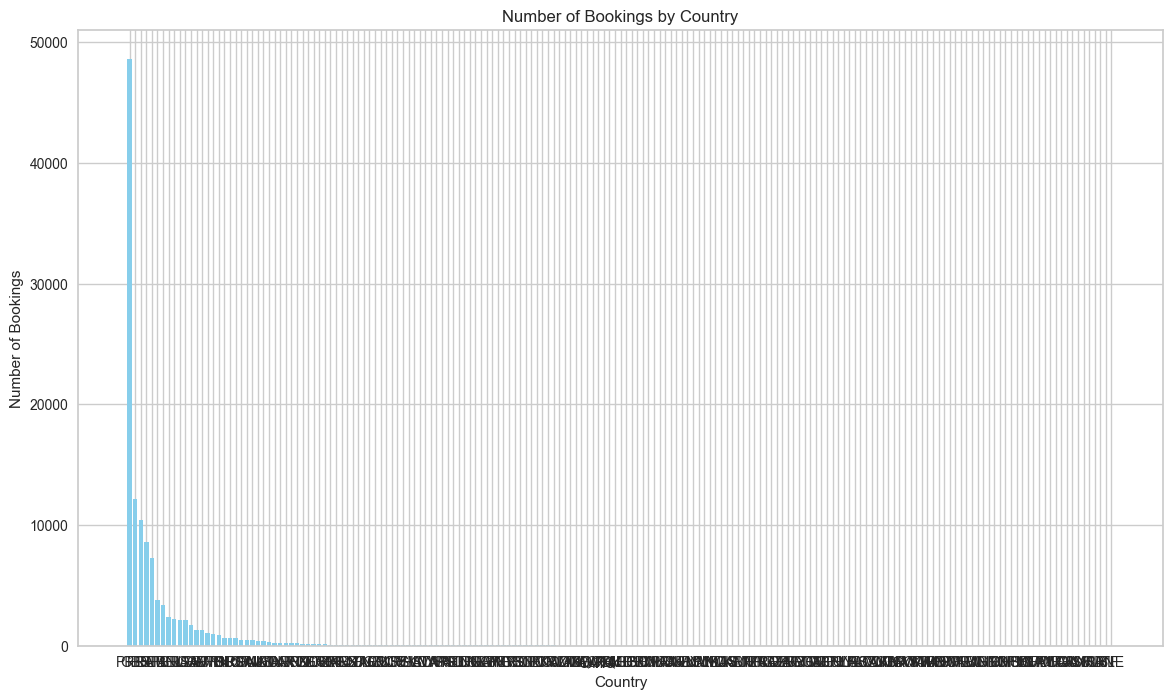

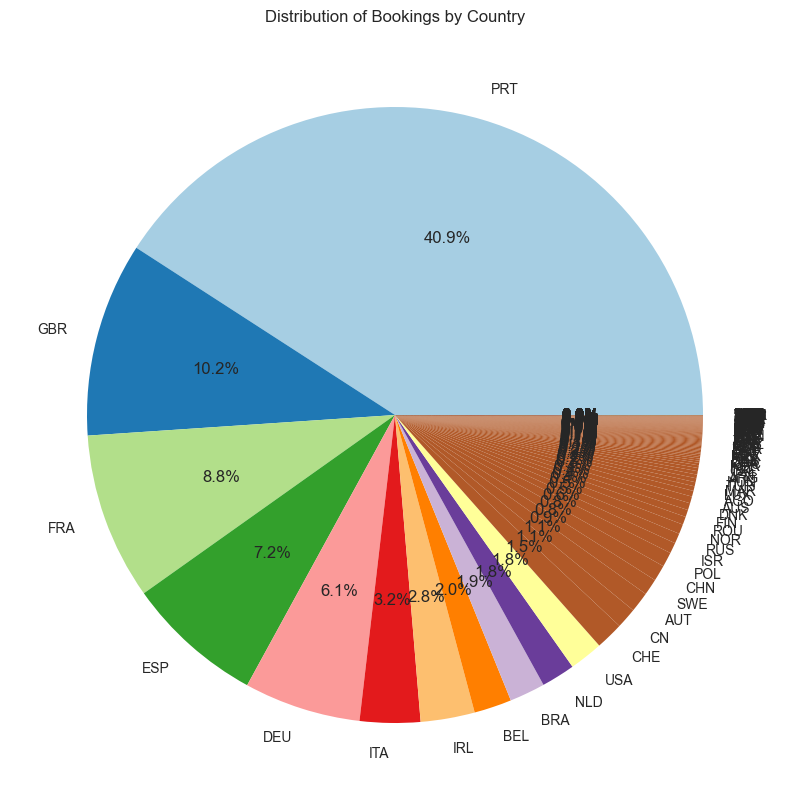

In [25]:
# Count the number of bookings by country
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Bookings']

# Bar Chart
plt.figure(figsize=(14, 8))
plt.bar(country_counts['Country'], country_counts['Number of Bookings'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Country')
# plt.xticks(rotation=90)
plt.show()

# Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(country_counts['Number of Bookings'], labels=country_counts['Country'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(country_counts))))
plt.title('Distribution of Bookings by Country')
plt.show()



2.4 Market Segment
Analysis:

Analyze cost variations based on market segments.
Identify if certain market segments result in higher operational costs.
Visualization:

Box Plot: Cost distribution across different market segments.
Bar Chart: Average cost by market segment.

C:\Users\vinee\AppData\Local\Temp\ipykernel_24420\2897039045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='adr', data=avg_cost_by_segment, palette='coolwarm')


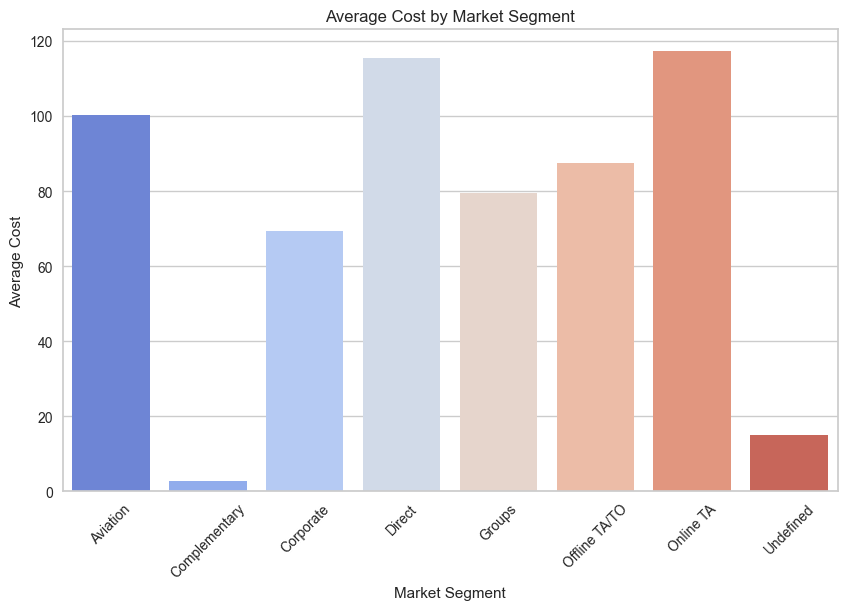

In [28]:
# Calculate average cost by market segment
avg_cost_by_segment = data.groupby('market_segment')['adr'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='adr', data=avg_cost_by_segment, palette='coolwarm')
plt.xlabel('Market Segment')
plt.ylabel('Average Cost')
plt.title('Average Cost by Market Segment')
plt.xticks(rotation=45)
plt.show()


2.5 Distribution Channels
Analysis:

Compare costs associated with different distribution channels.
Assess if certain channels result in higher operational costs.
Visualization:

Bar Chart: Average cost by distribution channel.
Stacked Bar Chart: Cost breakdown by distribution channel.

C:\Users\vinee\AppData\Local\Temp\ipykernel_24420\4050516640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distribution_channel', y='adr', data=avg_cost_by_channel, palette='pastel')


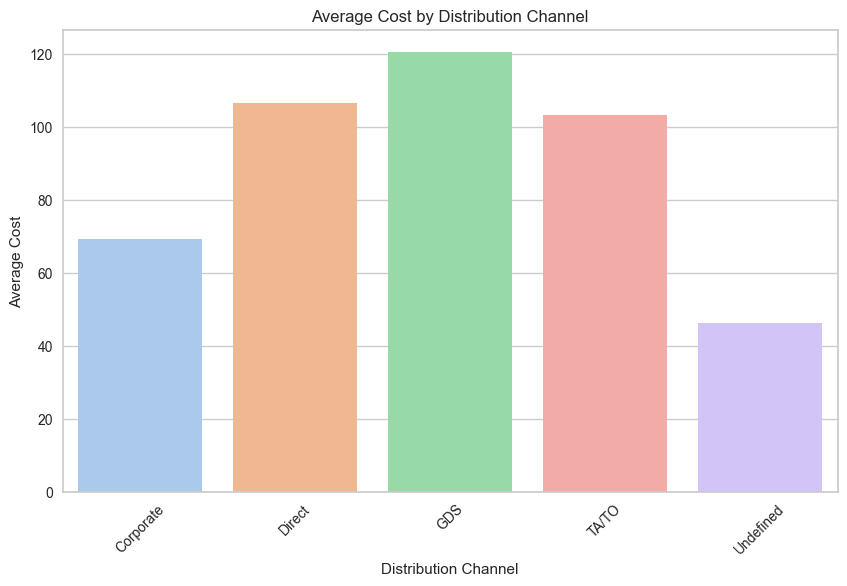

In [30]:
# Calculate average cost by distribution channel
avg_cost_by_channel = data.groupby('distribution_channel')['adr'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='distribution_channel', y='adr', data=avg_cost_by_channel, palette='pastel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Cost')
plt.title('Average Cost by Distribution Channel')
plt.xticks(rotation=45)
plt.show()
